In [1]:
import torch

# Load the saved dictionary
d_125m = torch.load("/home/tahir/workspace2/MaskedSmoothing/act_scales/opt-125m.pt", map_location="cpu")
d_1b = torch.load("/home/tahir/workspace2/MaskedSmoothing/act_scales/opt-1b.pt", map_location="cpu")
d_2b = torch.load("/home/tahir/workspace2/MaskedSmoothing/act_scales/opt-2b.pt", map_location="cpu")
d_7b = torch.load("/home/tahir/workspace2/MaskedSmoothing/act_scales/opt-7b.pt", map_location="cpu")

# Verify type
# print(type(data))

/home/tahir/workspace2/miniconda3/envs/smoothquant/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
for k, v in d_125m.items(): 
    print(f"{k}: {tuple(v.shape)}")

model.decoder.layers.0.self_attn.q_proj: (768,)
model.decoder.layers.0.self_attn.k_proj: (768,)
model.decoder.layers.0.self_attn.v_proj: (768,)
model.decoder.layers.0.self_attn.out_proj: (768,)
model.decoder.layers.0.fc1: (768,)
model.decoder.layers.0.fc2: (3072,)
model.decoder.layers.1.self_attn.q_proj: (768,)
model.decoder.layers.1.self_attn.k_proj: (768,)
model.decoder.layers.1.self_attn.v_proj: (768,)
model.decoder.layers.1.self_attn.out_proj: (768,)
model.decoder.layers.1.fc1: (768,)
model.decoder.layers.1.fc2: (3072,)
model.decoder.layers.2.self_attn.q_proj: (768,)
model.decoder.layers.2.self_attn.k_proj: (768,)
model.decoder.layers.2.self_attn.v_proj: (768,)
model.decoder.layers.2.self_attn.out_proj: (768,)
model.decoder.layers.2.fc1: (768,)
model.decoder.layers.2.fc2: (3072,)
model.decoder.layers.3.self_attn.q_proj: (768,)
model.decoder.layers.3.self_attn.k_proj: (768,)
model.decoder.layers.3.self_attn.v_proj: (768,)
model.decoder.layers.3.self_attn.out_proj: (768,)
model.decod

layer: model.decoder.layers.26.fc1
shape: torch.Size([2560])


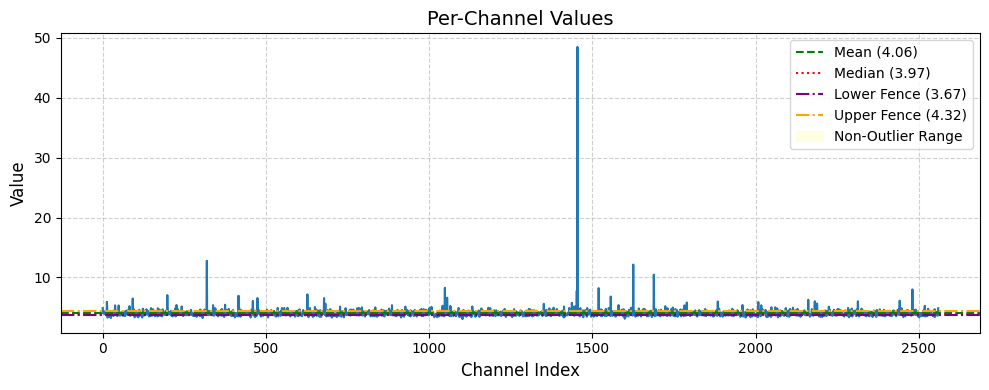

In [28]:
import torch
import matplotlib.pyplot as plt

keys = list(d_2b.keys()) 
ii = 160
perc = 0.02 

print(f"layer: {keys[ii]}")
print(f"shape: {d_2b[keys[ii]].shape}")
# Example tensor
# x = torch.randn(768)  # your tensor
# x = data['model.decoder.layers.0.self_attn.v_proj']
x = d_2b[keys[ii]]

mean_val = x.mean().item()
median_val = x.median().item()
q1 = x.quantile(0.25).item()  # 25th percentile
q3 = x.quantile(0.75).item()
iqr = q3 - q1 
lower_fence = q1 - 0.2 * iqr
upper_fence = q3 + 0.2 * iqr

# lower_fence = (median_val) - (perc *median_val)
# upper_fence = (median_val) + (perc *median_val)

# Count outliers
# below_fence = (x < lower_fence).sum().item()
# above_fence = (x > upper_fence).sum().item()
non_outliers = ((x >= lower_fence) & (x <= upper_fence)).sum().item()
# non_outliers_ = ((x <= lower_fence11) & (x >= upper_fence11)).sum().item()

plt.figure(figsize=(10, 4))  # wide layout looks best for 1D vectors
plt.plot(x.numpy(), linewidth=1.5)

plt.axhline(mean_val, color='green', linestyle='--', linewidth=1.5, label=f"Mean ({mean_val:.2f})")
plt.axhline(median_val, color='red', linestyle=':', linewidth=1.5, label=f"Median ({median_val:.2f})")

plt.axhline(lower_fence, color='purple', linestyle='-.', linewidth=1.5, label=f"Lower Fence ({lower_fence:.2f})")
plt.axhline(upper_fence, color='orange', linestyle='-.', linewidth=1.5, label=f"Upper Fence ({upper_fence:.2f})")

plt.fill_between(range(len(x)), lower_fence, upper_fence, color='yellow', alpha=0.1, label='Non-Outlier Range')
 
plt.title("Per-Channel Values", fontsize=14)
plt.xlabel("Channel Index", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [23]:
# Count outliers
below_fence , above_fence, non_outliers, len(keys)


(5, 273, 2282, 193)

In [45]:
import numpy as np 

c = 0
for val in np.arange(0.005, 0.1, 0.005):
    print(round(val, 3))

0.005
0.01
0.015
0.02
0.025
0.03
0.035
0.04
0.045
0.05
0.055
0.06
0.065
0.07
0.075
0.08
0.085
0.09
0.095


In [16]:
import torch
import matplotlib.pyplot as plt

# keys = list(d_125m.keys()) 
# keys = list(d_1b.keys()) 
# keys = list(d_2b.keys()) 
keys = list(d_7b.keys()) 
# ii = 30
perc = 0.02 

# print(f"layer: {keys[ii]}")
# print(f"shape: {d_125m[keys[ii]].shape}")
total_channels = 0 
total_outliers_non = 0 

for ii in range(len(keys)):
    
    x = d_7b[keys[ii]]
    mean_val = x.mean().item()
    median_val = x.median().item()

    lower_fence = (median_val) - (perc * median_val)
    upper_fence = (median_val) + (perc * median_val)


    non_outliers = ((x >= lower_fence) & (x <= upper_fence)).sum().item()

    print(f"i: {ii} | len(x): {len(x)}")
    print(f"outliers_non: {non_outliers}") 

    total_channels += len(x)
    total_outliers_non += non_outliers

print("======================")
print(f"total_channels: {total_channels}")
print(f"total_outliers_non: {total_outliers_non}") 

print(f"perc_masking: {100 * total_outliers_non / total_channels}")






i: 0 | len(x): 4096
outliers_non: 609
i: 1 | len(x): 4096
outliers_non: 609
i: 2 | len(x): 4096
outliers_non: 609
i: 3 | len(x): 4096
outliers_non: 138
i: 4 | len(x): 4096
outliers_non: 403
i: 5 | len(x): 16384
outliers_non: 529
i: 6 | len(x): 4096
outliers_non: 427
i: 7 | len(x): 4096
outliers_non: 427
i: 8 | len(x): 4096
outliers_non: 427
i: 9 | len(x): 4096
outliers_non: 55
i: 10 | len(x): 4096
outliers_non: 354
i: 11 | len(x): 16384
outliers_non: 393
i: 12 | len(x): 4096
outliers_non: 460
i: 13 | len(x): 4096
outliers_non: 460
i: 14 | len(x): 4096
outliers_non: 460
i: 15 | len(x): 4096
outliers_non: 61
i: 16 | len(x): 4096
outliers_non: 376
i: 17 | len(x): 16384
outliers_non: 457
i: 18 | len(x): 4096
outliers_non: 506
i: 19 | len(x): 4096
outliers_non: 506
i: 20 | len(x): 4096
outliers_non: 506
i: 21 | len(x): 4096
outliers_non: 73
i: 22 | len(x): 4096
outliers_non: 390
i: 23 | len(x): 16384
outliers_non: 468
i: 24 | len(x): 4096
outliers_non: 500
i: 25 | len(x): 4096
outliers_non: